# Spill Incidents  EDA

This dataset contains records of spills of petroleum and other hazardous materials. Under State law and regulations, spills that could pollute the lands or waters of the state must be reported by the spiller (and, in some cases, by anyone who has knowledge of the spill). Examples of what may be included in a spill record includes: Administrative information (DEC region and unique seven-digit spill number). Program facility name. Spill date/time. Location. Spill source and cause. Material(s) and material type spilled. Quantity spilled and recovered. Units measured. Surface water bodies affected. Close date (cleanup activity finished and all paperwork completed).

Data Source : https://catalog.data.gov/dataset/spill-incidents

In [76]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# load data set
spill_df =  pd.read_csv(r"C:\Users\jki\Downloads\Spill_Incidents.csv")
spill_df.head(5)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [78]:
# lets check for missing values
missing_values = spill_df.isna().sum()
print(missing_values)

Spill Number                  0
Program Facility Name         6
Street 1                    132
Street 2                 502238
Locality                   1124
County                        0
ZIP Code                 493010
SWIS Code                     0
DEC Region                    0
Spill Date                  151
Received Date               483
Contributing Factor           0
Waterbody                498193
Source                        0
Close Date                10577
Material Name                 0
Material Family               0
Quantity                      0
Units                    106252
Recovered                     0
dtype: int64


In [80]:
# lets drop unwanted columns 

# Columns to drop
columns_to_drop = ['Street 1', 'Street 2','ZIP Code','Close Date']
spill_df.drop(columns=columns_to_drop, inplace=True)
spill_df.head(5)

,Spill Number,Program Facility Name,Locality,County,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,ELMSFORD,Westchester,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,QUEENS,Queens,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,QUEENS,Queens,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,BRONX,Bronx,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,LIBERTY,Sullivan,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,transformer oil,Petroleum,6.0,Gallons,6.0


In [81]:
# lets check for missing values
missing_values = spill_df.isna().sum()
print(missing_values)

Spill Number                  0
Program Facility Name         6
Locality                   1124
County                        0
SWIS Code                     0
DEC Region                    0
Spill Date                  151
Received Date               483
Contributing Factor           0
Waterbody                498193
Source                        0
Material Name                 0
Material Family               0
Quantity                      0
Units                    106252
Recovered                     0
dtype: int64


In [83]:
# lets remove missing values
spill_df.dropna(subset=['Locality','Spill Date','Received Date','Waterbody','Units'],inplace =True)
# lets confirm existance of missing values
missing_values = spill_df.isna().sum()
print(missing_values)

Spill Number             0
Program Facility Name    0
Locality                 0
County                   0
SWIS Code                0
DEC Region               0
Spill Date               0
Received Date            0
Contributing Factor      0
Waterbody                0
Source                   0
Material Name            0
Material Family          0
Quantity                 0
Units                    0
Recovered                0
dtype: int64


In [84]:
spill_df.head(5)

,Spill Number,Program Facility Name,Locality,County,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Material Name,Material Family,Quantity,Units,Recovered
1,405586,BOWRY BAY,QUEENS,Queens,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,raw sewage,Other,0.0,Pounds,0.0
58,300950,#1 LAGOON GE SILICONES,WATERFORD,Saratoga,4654,5,04/28/2003,04/28/2003,Unknown,&#35;1 LAGOON,Commercial/Industrial,siloxane oil,Other,1.0,Gallons,0.0
61,8810080,#1 SPEED,WATERTOWN,Jefferson,2358,6,03/29/1989,03/29/1989,Deliberate,NONE,Commercial/Industrial,waste oil/used oil,Petroleum,5.0,Gallons,5.0
78,8605574,"#2 FUEL OIL/ 130-19,116 A",NEW YORK CITY,Queens,4101,2,12/03/1986,12/03/1986,Equipment Failure,SEWERS,Private Dwelling,#2 fuel oil,Petroleum,0.0,Gallons,0.0
85,8601792,#2 SHEEN UPPER BAY,NYC BROOKLYN,Kings,2401,2,06/15/1986,06/15/1986,Unknown,UPPER BAY,Unknown,#2 fuel oil,Petroleum,0.0,Gallons,0.0


In [85]:
# do we have unncessary negative values ?

spill_df.describe()

,Spill Number,SWIS Code,DEC Region,Quantity,Recovered
count,3.494500e+04,34945.000000,34945.000000,3.494500e+04,34945.000000
mean,5.714755e+06,3454.938589,4.673601,1.487926e+04,115.677342
std,4.161680e+06,1687.779726,2.558010,1.052910e+06,7103.782278
min,1.800000e+01,101.000000,1.000000,0.000000e+00,0.000000
25%,8.033950e+05,2324.000000,2.000000,0.000000e+00,0.000000
50%,8.702299e+06,3426.000000,4.000000,0.000000e+00,0.000000
75%,9.305283e+06,4722.000000,7.000000,1.000000e+01,0.000000
max,9.975735e+06,8500.000000,9.000000,1.500000e+08,999000.000000


In [86]:
# let have a look at the data types
spill_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34945 entries, 1 to 544609
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Spill Number           34945 non-null  int64  
 1   Program Facility Name  34945 non-null  object 
 2   Locality               34945 non-null  object 
 3   County                 34945 non-null  object 
 4   SWIS Code              34945 non-null  int64  
 5   DEC Region             34945 non-null  int64  
 6   Spill Date             34945 non-null  object 
 7   Received Date          34945 non-null  object 
 8   Contributing Factor    34945 non-null  object 
 9   Waterbody              34945 non-null  object 
 10  Source                 34945 non-null  object 
 11  Material Name          34945 non-null  object 
 12  Material Family        34945 non-null  object 
 13  Quantity               34945 non-null  float64
 14  Units                  34945 non-null  object 
 15  R

In [91]:
# lets change the datatypes
spill_df['Spill Date'] = pd.to_datetime(spill_df['Spill Date'])
spill_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34945 entries, 1 to 544609
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Spill Number           34945 non-null  int64         
 1   Program Facility Name  34945 non-null  object        
 2   Locality               34945 non-null  object        
 3   County                 34945 non-null  object        
 4   SWIS Code              34945 non-null  int64         
 5   DEC Region             34945 non-null  int64         
 6   Spill Date             34945 non-null  datetime64[ns]
 7   Received Date          34945 non-null  object        
 8   Contributing Factor    34945 non-null  object        
 9   Waterbody              34945 non-null  object        
 10  Source                 34945 non-null  object        
 11  Material Name          34945 non-null  object        
 12  Material Family        34945 non-null  object        
 13  

In [93]:
# Creating a new variable can be as simple ash, from 'Order Date':

spill_df['Month'] = spill_df['Spill Date'].dt.month
spill_df['Year'] = spill_df['Spill Date'].dt.year

spill_df.head(5)

,Spill Number,Program Facility Name,Locality,County,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Material Name,Material Family,Quantity,Units,Recovered,Month,Year
1,405586,BOWRY BAY,QUEENS,Queens,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,raw sewage,Other,0.0,Pounds,0.0,8,2004
58,300950,#1 LAGOON GE SILICONES,WATERFORD,Saratoga,4654,5,2003-04-28,04/28/2003,Unknown,&#35;1 LAGOON,Commercial/Industrial,siloxane oil,Other,1.0,Gallons,0.0,4,2003
61,8810080,#1 SPEED,WATERTOWN,Jefferson,2358,6,1989-03-29,03/29/1989,Deliberate,NONE,Commercial/Industrial,waste oil/used oil,Petroleum,5.0,Gallons,5.0,3,1989
78,8605574,"#2 FUEL OIL/ 130-19,116 A",NEW YORK CITY,Queens,4101,2,1986-12-03,12/03/1986,Equipment Failure,SEWERS,Private Dwelling,#2 fuel oil,Petroleum,0.0,Gallons,0.0,12,1986
85,8601792,#2 SHEEN UPPER BAY,NYC BROOKLYN,Kings,2401,2,1986-06-15,06/15/1986,Unknown,UPPER BAY,Unknown,#2 fuel oil,Petroleum,0.0,Gallons,0.0,6,1986


## 1.What is the Average Spill Incidents in the State of NewYork


In [89]:

rounded_mean = round(spill_df['Spill Number'].mean())
print(rounded_mean)

5714755


## 2.Whats the Maximum Spill Incidents in the State of NewYork


In [90]:

spill_df['Spill Number'].max()

9975735

## 3 . What was the highest month for spill incidents? How much was  number of spillage  that month?


In [114]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

# 1. What was the highest month for spillage? How much was the total for  that month?

# Replace NaN or inf values in the 'Month' column with a default value (e.g., 0)
spill_df['Month'] = spill_df['Month'].fillna(0).astype(int)

# Convert month numbers to abbreviated month names
spill_df['Month Name'] = spill_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate total spillage  for each month
spillage_by_month = spill_df.groupby('Month Name').sum()['Spill Number']

# Find the best month for spilage  and the corresponding earnings
highest_month = spillage_by_month.idxmax()
spillage_for_highest_month = spillage_by_month.max()

print(f"The highest month for spillage was {highest_month} with spillage number of {spillage_for_highest_month:,.2f}")

The highest month for spillage was Aug with spillage number of 20,643,665,462.00


## 4 Which Localities   had the highest number of Spillage ?

Locality
BROOKLYN         5654387943
STATEN ISLAND    5589219069
ROCHESTER        5472792456
MANHATTAN        2982323672
FORT DRUM        2684160065
Name: Spill Number, dtype: int64


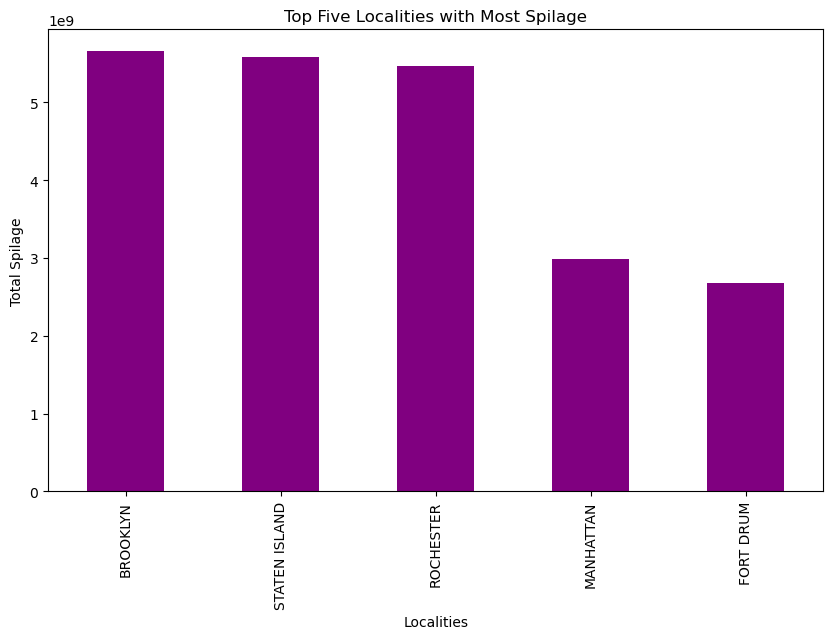

In [104]:
# Plot the highest number of spilage for each locality
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter


spillage_by_locality = spill_df.groupby('Locality').sum()['Spill Number'] # Take the number of spillage for each Locality

# Sort the values in descending order and select the top five
top_five_localities = spillage_by_locality.sort_values(ascending=False).head(5)

# Display the result
print(top_five_localities)

# Plot the top Five Localities
top_five_localities.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Top Five Localities with Most Spilage')
plt.xlabel('Localities')
plt.ylabel('Total Spilage')
plt.show()

## 5 Which Counties  had the highest number of Spillage ?

County
Suffolk        12581307326
Jefferson      12146133367
Monroe         12003919132
St Lawrence    10062600292
Westchester     9759832821
Name: Spill Number, dtype: int64


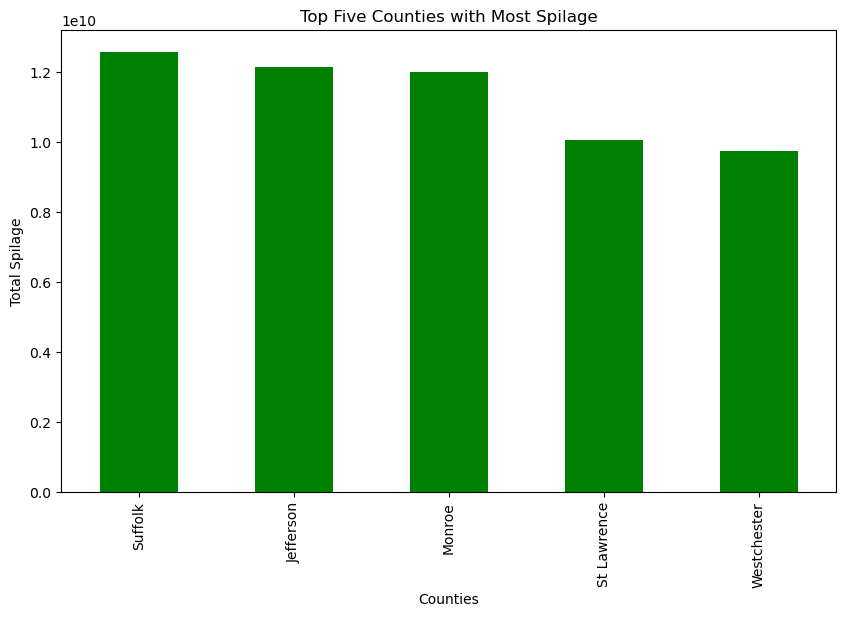

In [112]:
# Load in some packages
spillage_by_County = spill_df.groupby('County').sum()['Spill Number'] # Take the number of spiallage for each County

# Sort the values in descending order and select the top five
top_five_Counties = spillage_by_County.sort_values(ascending=False).head(5)

# Display the result
print(top_five_Counties)

# Plot the top Five Counties
top_five_Counties.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top Five Counties with Most Spilage')
plt.xlabel('Counties')
plt.ylabel('Total Spilage')
plt.show()

## 6 Which Localities   had the Lowest  number of Spillage ?

Locality
NEW SCOTLAND  VOORHEESVILLE     342
LAKE CHAMPLAIN                  978
TOWN CICERO                    1570
LAKE GEORGE VILLAGE            1665
MOHAWK V                       1868
Name: Spill Number, dtype: int64


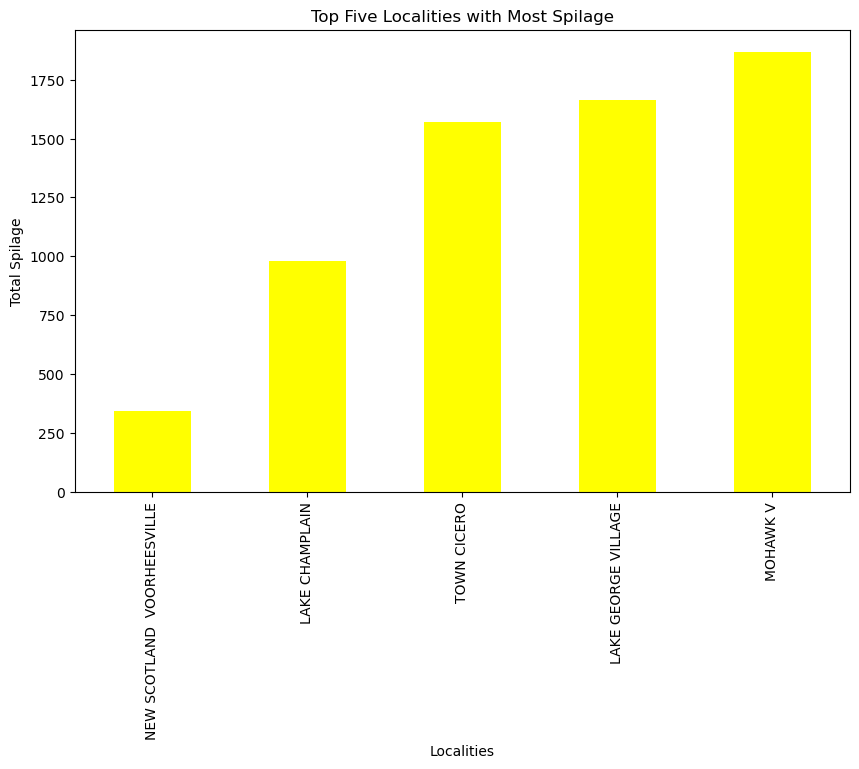

In [109]:
spillage_by_locality = spill_df.groupby('Locality').sum()['Spill Number'] # Take the number of spillage for each Locality

# Sort the values in descending order and select the top five
top_five_localities = spillage_by_locality.sort_values(ascending=True).head(5)

# Display the result
print(top_five_localities)

# Plot the top Five Localities
top_five_localities.plot(kind='bar', color='yellow', figsize=(10, 6))
plt.title('Top Five Localities with Most Spilage')
plt.xlabel('Localities')
plt.ylabel('Total Spilage')
plt.show()

## 4 Which Program Facility Name   had the highest number of Spillage ?

Program Facility Name
UNKNOWN         5482582010
FORT DRUM       2739288169
UNK             1937125284
HUDSON RIVER    1381002778
GE SILICONES     774011813
Name: Spill Number, dtype: int64


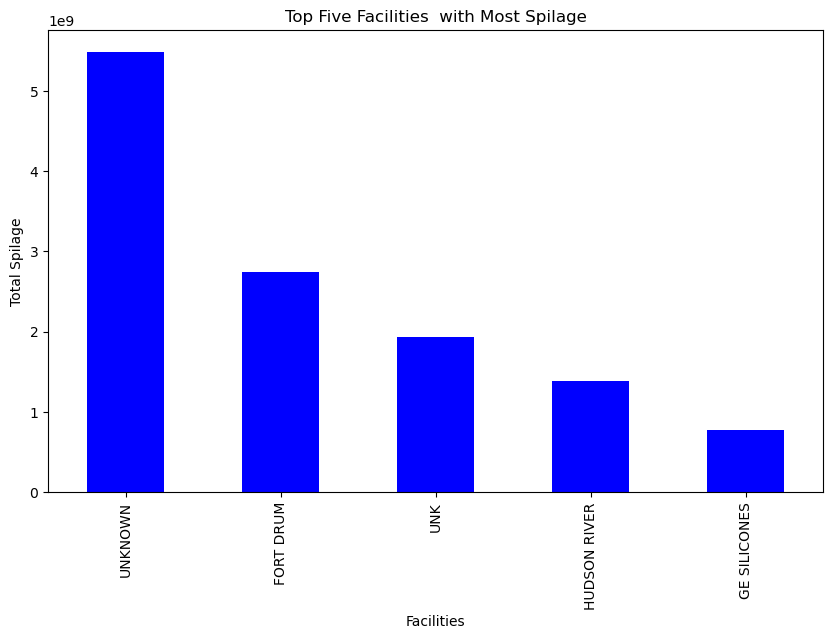

In [113]:
spillage_by_Program_Facility_Name = spill_df.groupby('Program Facility Name').sum()['Spill Number'] # Take the number of spiallage for each falility

# Sort the values in descending order and select the top five
top_five_facilities  = spillage_by_Program_Facility_Name.sort_values(ascending=False).head(5)

# Display the result
print(top_five_facilities)

# Plot the top Five Localities
top_five_facilities.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Top Five Facilities  with Most Spilage')
plt.xlabel('Facilities')
plt.ylabel('Total Spilage')
plt.show()